# Support Vector Machine 

- Là thuật toán phổ biến , thường dùng trong classification

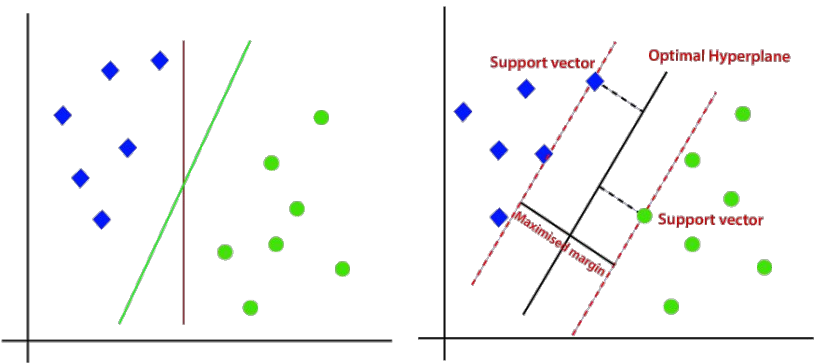

- Giả sử có bài toán : phân biệt 1000 ông Việt Nam , 2000 ông nhật bổn , với đủ loại feature (chiều cao , cân nặng ...) 

- Với Logistic Regression , chúng ta sẽ fit hết cả 3000 người vào model và tìm ra cái đường phân chia cho 1000 ông Việt Nam đứng về 1 bên và 2000 ông nhật bổn đứng 1 bên và mô hình phải tối thiểu hóa sai số .

- Bài toán đặt ra là , làm sao để tiết kiệm thời gian , tiết kiệm chi phí tính toán , có cách nào để huấn luyện mô hình mà không cần dùng hết 3000 dữ liệu trên hay không ?

- Trong thực  tế nhá : 
    - Ví như chúng ta huấn luyện cho 1 đứa trẻ con không biết gì đi mà chúng ta dạy cho nó cả 3000 người là điều rất khoai

- Ý tưởng ở đây là : 
    - Chọn ra những ông Việt Nam trông giống người nhật bổn nhất và những ông nhật bổn giống người Việt Nam nhất tạo ra 1 tập con
    - Mô hình chỉ huấn luyện trên tập con này
    - Vì tập con này là tập khó phân biệt nhất , nếu mô hình nó phân biệt được những ca khó này rồi thì sẽ phân biệt được các ca dễ hơn (tỷ lệ cao hơn chứ không phải 100%)

- Thế bây giờ chúng ta thử nhìn hình bên dưới : 

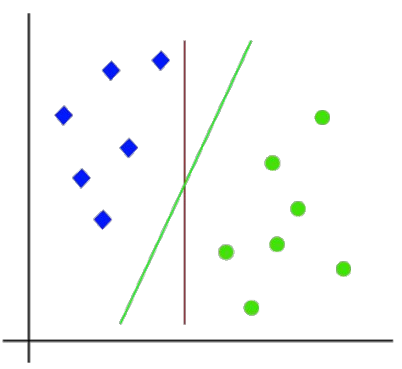

- Chúng ta cần xây dựng mô hình phân biệt giữa class hình thoi và class hình tròn.
- Về lý thuyết chúng ta có thể vẽ vô số đường để chia 2 hình này về 2 phía bao gồm cả đường xanh đỏ như trong hình.
- Tuy nhiên trong thực tế chúng ta thích đường màu xanh hơn , vì nó đều .- Trong vô vàn đường có thể phân chia 2 class thì chúng ta nên chọn đường nào thỏa mãn 2 thứ : 
    - cách đều các điểm gần nhất của 2 class 
    - khoảng cách phải là tối đa (margin)
- Đường phân cách gọi chung là siêu phẳng (hyperplane) .

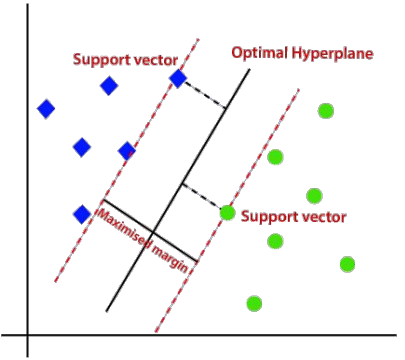

- Tóm lại : Mục đích của Support Vector Machine là tạo ra 1 đường hoặc 1 phân cách tối ưu nhất (optimal hyperplane) , rõ ràng nhất để phân tách các datapoints về các phía của đường phân tách này giúp cho các điểm mới trong tương lai sẽ được đặt vào 1 trong 2 class này 1 cách đúng nhất.


- Chúng ta tìm hiểu sâu hơn 1 chút về SVM (các định nghĩa chi tiết hơn):
    - **Siêu Phẳng (Hyperplane)**:
        - Trong không gian n chiều, một siêu phẳng là một không gian con có số chiều bằng n-1. Ví dụ, trong không gian 2D, siêu phẳng là một đường thẳng, và trong không gian 3D, siêu phẳng là một mặt phẳng.
        - Mục tiêu của SVM là tìm siêu phẳng có khoảng cách lớn nhất đến điểm dữ liệu gần nhất của mỗi lớp. Khoảng cách này được gọi là margin.

        - Biểu diễn Toán học của Siêu Phẳng:
        - Siêu phẳng có thể được biểu diễn bằng phương trình: w⋅x−b=0, trong đó w là vector trọng số, b là bias, và x là vector đầu vào.

    - **Margin** là khoảng cách giữa siêu phẳng và các điểm dữ liệu gần nhất từ mỗi lớp, được gọi là support vectors. SVM tối đa hóa margin này để tăng cường độ chính xác và khả năng tổng quát hóa của mô hình.

    - **Bài toán tối ưu hóa trong SVM** : là tìm w và b sao cho margin được tối đa hóa. Điều này dẫn đến một bài toán tối ưu hóa ràng buộc.

    - **Hàm Mục tiêu**:
        - Hàm mục tiêu được sử dụng trong SVM là tối thiểu hóa $\frac{1}{2}\|\mathbf{w}\|^2$ với điều kiện là tất cả các điểm dữ liệu phải được phân loại một cách chính xác. Điều kiện này được biểu diễn qua các ràng buộc: $y_i(\mathbf{w} \cdot \mathbf{x}_i - b) \geq 1$, với $y_i$ là nhãn của điểm dữ liệu $i$.

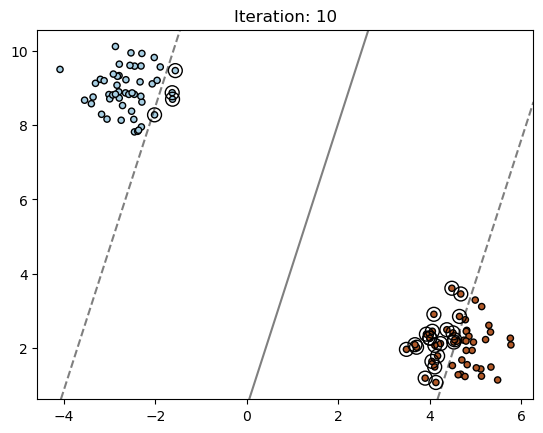

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier
from sklearn.metrics.pairwise import euclidean_distances
from time import sleep
from IPython.display import clear_output

# Tạo dữ liệu giả
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=0.60)

# Khởi tạo SGDClassifier với hinge loss để mô phỏng SVM
clf = SGDClassifier(loss='hinge', alpha=0.001, max_iter=1000, penalty='l2', learning_rate='constant', eta0=0.001)

def plot_hyperplane(clf, X, y, t):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='black', s=20)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Tạo lưới để vẽ
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Vẽ đường quyết định và margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Tìm và vẽ "giả định" support vectors
    distances = clf.decision_function(X)
    support_vector_indices = np.where(np.abs(distances) <= 1 + 1e-15)[0]
    ax.scatter(X[support_vector_indices, 0], X[support_vector_indices, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.title(f'Iteration: {t+1}')
    plt.show()

# Huấn luyện mô hình từng phần và vẽ hyperplane
for t in range(10): # Giả sử chúng ta cập nhật mô hình 10 lần
    if t > 0: # Cập nhật mô hình với dữ liệu mới
        clf.partial_fit(X[t*10:(t+1)*10], y[t*10:(t+1)*10], classes=np.unique(y))
    else: # Lần đầu tiên phải cung cấp classes
        clf.partial_fit(X[t*10:(t+1)*10], y[t*10:(t+1)*10], classes=np.unique(y))
    
    # Vẽ đồ thị
    clear_output(wait=True)
    plot_hyperplane(clf, X, y, t)
    sleep(1) # Dừng 1 giây giữa các lần cập nhật để dễ quan sát